# Ejercicio clasificación con SVM

1. Carga el conjunto de datos MNIST utilizando sklearn.datasets.load_digits().

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar el conjunto de datos MNIST
digits = load_digits(as_frame=True).frame

Divide el conjunto de datos en un conjunto de entrenamiento y otro de prueba. Llamalos X_train, y_train, X_test, e y_test.  

In [ ]:
X = digits.drop(columns='target', axis=1)
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Crea un transformador llamado *NormalizadorPixels* que normalice el valor de los pixeles, dicha normalización consistirá en dividir cada píxel por 255.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class NormalizadorPixels(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X/255

Define un Pipeline en el que se llame al anterior transformador y posteriormente se entrene un clasificador SVM utilizando sklearn.svm.SVC.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline1 = Pipeline([
    ('NormalizadorPixels', NormalizadorPixels()),
    ("linear_svc", SVC(kernel="linear", C=0.1)),
])

pipeline1.fit(X_train, y_train)

Pipeline(steps=[('NormalizadorPixels', NormalizadorPixels()),
                ('linear_svc', SVC(C=0.1, kernel='linear'))])

Evalúa el rendimiento del clasificador en el conjunto de prueba utilizando métricas como la precisión, el recall y la matriz de confusión.

In [ ]:
# Paso 5: Evaluar el rendimiento del clasificador
y_pred = pipeline1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del clasificador SVM:", accuracy)
print("Matriz de confusión:")
print()
print(conf_matrix)

Precisión del clasificador SVM: 0.975
Matriz de confusión:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 28  1]
 [ 0  0  0  0  0  1  0  2  0 37]]


Experimenta con diferentes kernels (lineal, polinomial, radial) y otros hiperparámetros de SVM para ver cómo afectan al rendimiento del modelo.

In [ ]:
import pandas as pd
class NormalizadorPixels(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X

lista_kernels = ['poly', 'linear', 'sigmoid', 'rbf']
lista_num = [0.1, 0.5, 2, 10, 20]
resultados = {}

for i in lista_kernels:
    for e in lista_num:
        pipeline1 = Pipeline([
            ('NormalizadorPixels', NormalizadorPixels()),
            ("linear_svc", SVC(kernel=i, C=e)),
        ])

        pipeline1.fit(X_train, y_train)
        y_pred = pipeline1.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        resultados[f'{i} con {e}'] = accuracy

s = pd.Series(resultados)

print(f"{s.idxmax()} tiene {s.max()} de accuracy")



poly con 0.5 tiene 0.9888888888888889 de accuracy


Visualiza algunos ejemplos de imágenes mal clasificadas para entender en qué casos el modelo tiene dificultades.

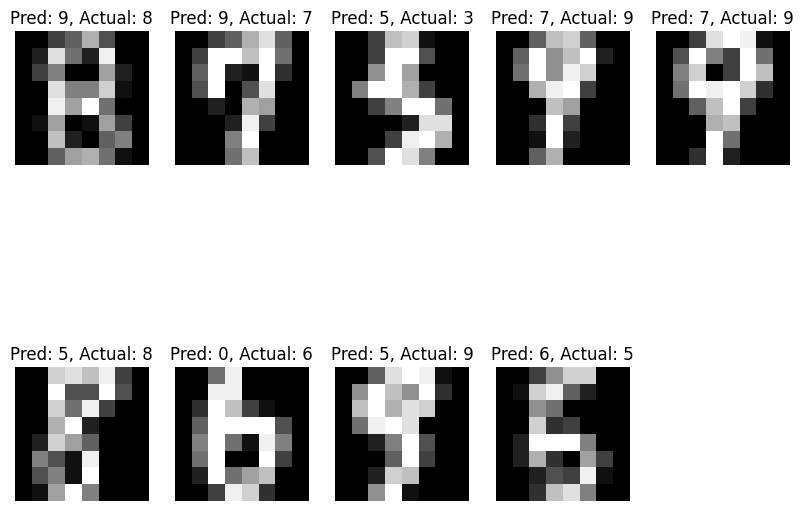

In [ ]:
# Paso 6: Visualizar algunos ejemplos de imágenes mal clasificadas
misclassified_idx = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 8))
X_test = X_test.values
y_test = y_test.values
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, Actual: {y_test[idx]}")
    plt.axis('off')
plt.show()
